c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006
c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)
epoch0, train acc:0.11666666666666667, test acc:0.1009
epoch1, train acc:0.11666666666666667, test acc:0.1013
epoch2, train acc:0.11666666666666667, test acc:0.1033
epoch3, train acc:0.14333333333333334, test acc:0.1121
epoch4, train acc:0.16, test acc:0.1219
epoch5, train acc:0.17333333333333334, test acc:0.1314
epoch6, train acc:0.21333333333333335, test acc:0.148
epoch7, train acc:0.22, test acc:0.1542
epoch8, train acc:0.25, test acc:0.1814
epoch9, train acc:0.31, test acc:0.2149
epoch10, train acc:0.3233333333333333, test acc:0.2378
epoch11, train acc:0.3333333333333333, test acc:0.2434
epoch12, train acc:0.34, test acc:0.2587
epoch13, train acc:0.3433333333333333, test acc:0.2587
epoch14, train acc:0.37, test acc:0.2885
epoch15, train acc:0.38666666666666666, test acc:0.301
epoch16, train acc:0.4, test acc:0.3085
epoch17, train acc:0.41333333333333333, test acc:0.3107
epoch18, train

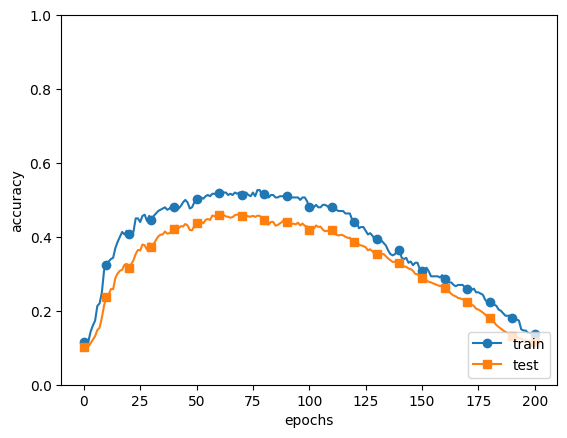

In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay(가중치 감쇠) 설정 ==============
#weight_decay_lambda = 0 # weight decay를 사용하지 않는경우
weight_decay_lambda = 0.1
# ============================================

network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100],
        output_size =10, weight_decay_lambda = weight_decay_lambda)
optimizer = SGD(lr = 0.01) #학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print('epoch' + str(epoch_cnt) + ", train acc:" + str(train_acc)+", test acc:"+str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

    
# 그래프 그리기==========
markers = {'train' : 'o', "test" : "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', markevery=10, label = 'train')
plt.plot(x, test_acc_list, marker='s', markevery=10, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc = 'lower right')
plt.show()

